/tmp/ipykernel_312029/1553751450.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x="Gender", y="PageRank", order=["male", "female"], showfliers=False, palette=palette_Emma)


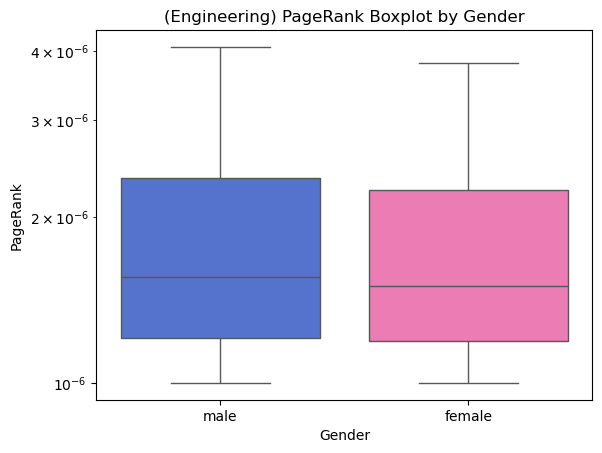

Summary Statistics of PageRank by Gender (Engineering)
            count          mean           std           min           25%  \
Gender                                                                      
female   692960.0  9.226730e-08  2.475192e-07  4.068320e-08  4.068320e-08   
male    4299465.0  1.329392e-07  4.383190e-07  4.068320e-08  4.068320e-08   

                 50%           75%       max  
Gender                                        
female  4.654082e-08  7.420728e-08  0.000034  
male    5.470069e-08  1.024601e-07  0.000123  


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Engineering_pagerank.csv")

df_filtered = df[df["PageRank"] > 1e-6]
df_filtered = df_filtered[df_filtered["Gender"] != "unknown"]


palette_Emma = {
    "male": "royalblue",
    "female": "hotpink"
}


sns.boxplot(data=df_filtered, x="Gender", y="PageRank", order=["male", "female"], showfliers=False, palette=palette_Emma)
plt.yscale('log')
plt.title("(Engineering) PageRank Boxplot by Gender")
plt.show()

#print(df.groupby("Gender")["PageRank"].describe())
print("Summary Statistics of PageRank by Gender (Engineering)")
print(
    df[df["Gender"].isin(["male", "female"])]
    .groupby("Gender")["PageRank"]
    .describe()
)

In [1]:
from scipy.stats import mannwhitneyu

male = df[df["Gender"] == "male"]["PageRank"]
female = df[df["Gender"] == "female"]["PageRank"]

stat, p = mannwhitneyu(male, female, alternative="two-sided")
print(f"Mann-Whitney U test: U={stat}, p={p}")

NameError: name 'df' is not defined

In [5]:
top_10_percent = df[df["PageRank"] > df["PageRank"].quantile(0.9)]
top_gender_dist = top_10_percent["Gender"].value_counts(normalize=True)
print(top_10_percent)
print(top_gender_dist)


           AuthorId      PageRank   Gender
7        2083469443  2.372733e-07     male
9        2161372213  4.634644e-07     male
10       2158647710  8.486058e-07     male
11       2111909734  1.047833e-06     male
12       2140265066  9.940068e-07     male
...             ...           ...      ...
7920889  2577533860  1.096344e-06     male
7921109  3097974843  5.589894e-07  unknown
7921282  2146654645  2.776115e-07     male
7921466  2612031796  3.153565e-07     male
7921554  2223060845  2.712214e-07     male

[792163 rows x 3 columns]
Gender
male       0.574685
unknown    0.374056
female     0.051260
Name: proportion, dtype: float64


In [6]:
overall_dist = df["Gender"].value_counts(normalize=True)
print(overall_dist)

Gender
male       0.542751
unknown    0.369772
female     0.087477
Name: proportion, dtype: float64


In [ ]:
import numpy as np

def gini(array):
    """Compute Gini coefficient of a numpy array."""
    array = np.sort(array)
    n = len(array)
    cumulative = np.cumsum(array, dtype=float)
    relative_mean = array.mean()
    gini_index = (2 * np.sum((np.arange(1, n + 1) * array))) / (n * np.sum(array)) - (n + 1) / n
    return gini_index

import pandas as pd
for gender in df["Gender"].unique():
    group = df[df["Gender"] == gender]
    gini_score = gini(group["PageRank"].values)
    print(f"Gini coefficient for {gender}(PageRank): {gini_score:.4f}")

overall_gini = gini(df["PageRank"].values)
print(f"Overall Gini coefficient (PageRank): {overall_gini:.4f}")

In [11]:
import pandas as pd

# === Load data ===
pagerank_df = pd.read_csv("Engineering_pagerank.csv")
df["PageRank"] = df["PageRank"] * 1_000_000  # for parts-per-million scale

citations_df = pd.read_csv("Engineering_citation_count.csv")

# === Merge citation counts ===
df = pagerank_df.merge(
    citations_df[["AuthorId", "CitationCount"]],
    on="AuthorId",
    how="left"
)

df["CitationCount"] = df["CitationCount"].fillna(0).astype(int)

# === Compute overall rank based on PageRank ===
df["OverallRank"] = df["PageRank"].rank(method="min", ascending=False).astype(int)

# === Compute gender-specific ranks ===
df["GenderRank"] = df.groupby("Gender")["PageRank"]\
    .rank(method="min", ascending=False).astype(int)

# === Get top 10 men and top 10 women ===
men = df[df["Gender"] == "male"].nsmallest(10, "GenderRank")
women = df[df["Gender"] == "female"].nsmallest(10, "GenderRank")
unknown = df[df["Gender"] == "unknown"].nsmallest(10, "GenderRank")

# === Prepare final output ===
men_cols = men[["GenderRank", "OverallRank", "CitationCount"]].reset_index(drop=True)
women_cols = women[["GenderRank", "OverallRank", "CitationCount"]].reset_index(drop=True)
unknown_cols = unknown[["GenderRank", "OverallRank", "CitationCount"]].reset_index(drop=True)

men_cols.columns = ["Men_GenderRank", "Men_OverallRank", "Men_CitationCount"]
women_cols.columns = ["Women_GenderRank", "Women_OverallRank", "Women_CitationCount"]
unknown_cols.columns = ["Unknown_GenderRank", "Unknown_OverallRank", "Unknown_CitationCount"]

# === Combine side-by-side ===
final_df = pd.concat([men_cols, women_cols, unknown_cols], axis=1)

# === Save and display ===
final_df.to_csv("top_10_gender_comparison_engineering.csv", index=False)
print(final_df)


   Men_GenderRank  Men_OverallRank  Men_CitationCount  Women_GenderRank  \
0               1                2              19280                 1   
1               2                3              46127                 2   
2               3                4              28562                 3   
3               4                5              11870                 4   
4               5                6              14496                 5   
5               6                7               7517                 6   
6               7                8               4506                 7   
7               8                9              39751                 8   
8               9               10              18958                 9   
9              10               11              56215                10   

   Women_OverallRank  Women_CitationCount  Unknown_GenderRank  \
0                 76                 1412                   1   
1                137                26420   